In [1]:
# --- CELL: Importing Required Libraries ---
# - Pandas (pd): Data manipulation using DataFrames.
# - Matplotlib (plt): Data visualization (histograms, charts).
# - NumPy (np): Numerical operations and array handling.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# --- CELL: Loading the Spaceship Titanic Training Dataset ---
# The Spaceship Titanic dataset is a classification problem where we predict
# whether a passenger was 'Transported' to another dimension.
# Features include planet of origin, cabin info, spending on amenities, etc.

data=pd.read_csv(r"C:\Users\elwin\OneDrive\Desktop\Project datasets\Spaceship data\train.csv")

In [3]:
# --- CELL: Displaying the Full Dataset ---
# Shows all rows and columns for an initial overview.

data

# OUTPUT: DataFrame with ~8693 rows × 14 columns.
# Key columns: PassengerId, HomePlanet, CryoSleep, Cabin, Destination,
# Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name, Transported.

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
# --- CELL: Listing All Column Names ---

data.columns

# OUTPUT: Index of all 14 column names in the dataset.

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [5]:
# --- CELL: Unique Home Planets ---
# Shows the distinct values in the HomePlanet column.

data['HomePlanet'].unique()

# OUTPUT: ['Europa', 'Earth', 'Mars', nan]
# Three planets plus some missing values.

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [6]:
# --- CELL: Count of Missing HomePlanet Values ---

data['HomePlanet'].isna().sum()

# OUTPUT: Number of rows with missing HomePlanet (approximately 201).

201

In [7]:
# --- CELL: Dataset Shape (Rows × Columns) ---

data.shape

# OUTPUT: (8693, 14) — 8693 passengers with 14 features each.

(8693, 14)

In [8]:
# --- CELL: Missing Values Count per Column ---
# Critical for understanding which features need imputation.

data.isna().sum()

# OUTPUT: Shows nulls per column.
# RoomService, FoodCourt, ShoppingMall, Spa, VRDeck have ~200 nulls each.
# CryoSleep, VIP, Age, HomePlanet, Cabin, Destination also have some nulls.
# Name has very few. Transported (target) has no nulls.

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
# --- CELL: Column Data Types ---

data.dtypes

# OUTPUT: Shows types — object (categorical/text), float64 (numeric), bool.
# CryoSleep and VIP are boolean; spending columns are float; rest are object or float.

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [10]:
# --- CELL: Cross-Tabulation of HomePlanet vs Destination ---
# Shows the count of passengers from each planet going to each destination.

pd.crosstab(data['HomePlanet'], data['Destination'])

# OUTPUT: A contingency table showing travel patterns.
# TRAPPIST-1e is the most popular destination across all planets.
# Earth has the most passengers overall.

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
HomePlanet,,,
Earth,690,712,3101
Europa,886,19,1189
Mars,193,49,1475


In [11]:
# --- CELL: Cross-Tabulation of VRDeck Spending vs HomePlanet ---
# Shows spending patterns on VRDeck by home planet.
# WARNING: VRDeck is continuous, so this creates a very large sparse table.

pd.crosstab(data['VRDeck'],data['HomePlanet'])

# OUTPUT: Many rows (one per unique VRDeck value) — not very interpretable for continuous data.

HomePlanet,Earth,Europa,Mars
VRDeck,,,
0.0,2843,1083,1432
1.0,93,26,19
2.0,42,13,13
3.0,41,5,10
4.0,29,11,7
...,...,...,...
16337.0,0,1,0
17074.0,0,1,0
17306.0,0,1,0


In [12]:
# --- CELL: Target Variable Distribution (Transported) ---
# Shows the percentage of passengers who were/weren't transported.

data['Transported'].value_counts(normalize=True)*100

# OUTPUT: Approximately 50-50 split between Transported True and False.
# This is a balanced dataset, which is good for classification.

Transported
True     50.362361
False    49.637639
Name: proportion, dtype: float64

In [13]:
# --- CELL: Summary Statistics for Numerical Columns ---
# describe() shows count, mean, std, min, 25%, 50%, 75%, max.

data.describe()

# OUTPUT: Key insights:
# - Age: Mean ~29, range 0-79. Most passengers are young adults.
# - RoomService/FoodCourt/Spa/VRDeck: Highly right-skewed (mean >> median).
#   Many passengers spent 0, but a few spent very large amounts.
# - ShoppingMall: Similar skewed pattern.

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<Axes: >

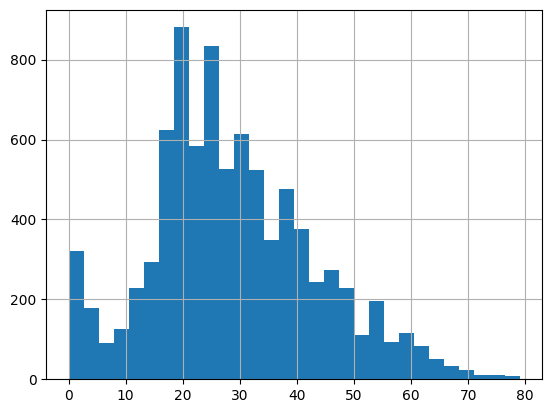

In [14]:
# --- CELL: Age Distribution Histogram ---

data['Age'].hist(bins=30)

# OUTPUT: Bell-shaped distribution centered around 25-30 with a slight right skew.
# There's a notable bump near age 0-5 (infants/toddlers).

In [15]:
# --- CELL: Age Skewness ---

data['Age'].skew()

# OUTPUT: ~0.42 — slight positive (right) skew.
# The distribution is nearly symmetric, suitable for median imputation.

0.41909658301471536

<Axes: >

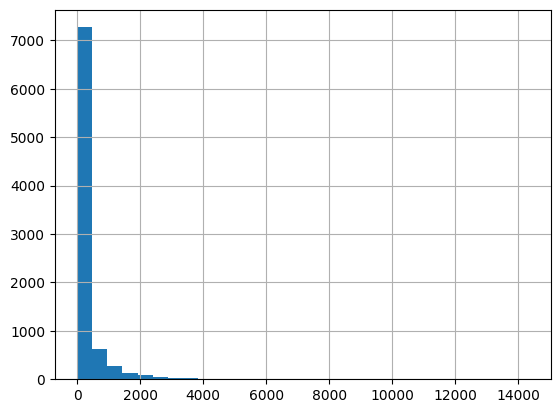

In [16]:
# --- CELL: RoomService Distribution Histogram ---

data['RoomService'].hist(bins=30)

# OUTPUT: Extremely right-skewed — vast majority of values are 0.
# A few passengers spent thousands on room service.

<Axes: >

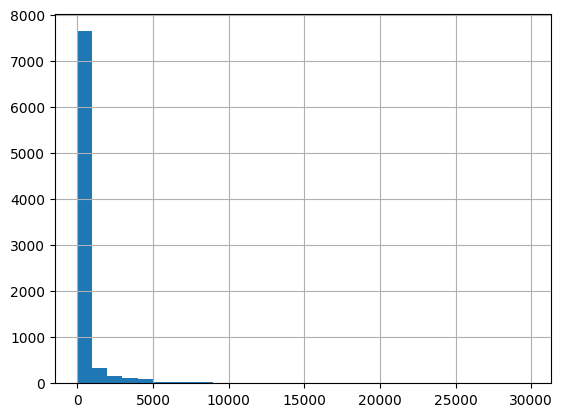

In [17]:
# --- CELL: FoodCourt Distribution Histogram ---

data['FoodCourt'].hist(bins=30)

# OUTPUT: Similarly extremely right-skewed distribution.
# Most passengers spent 0 at the food court.

In [18]:
# --- CELL: FoodCourt Skewness ---

data['FoodCourt'].skew()

# OUTPUT: ~7.1 — very strong positive skew.
# This confirms the distribution is heavily right-tailed.

7.102227852514122

In [19]:
# --- CELL: CryoSleep vs Transported Cross-Tabulation ---
# Shows the relationship between cryogenic sleep and being transported.

pd.crosstab(data['CryoSleep'],data['Transported'])

# OUTPUT: Strong relationship!
# CryoSleep=True: 2483 transported vs 554 not — 82% transport rate.
# CryoSleep=False: 1789 transported vs 3650 not — 33% transport rate.
# CryoSleep is a very strong predictor of being transported.

Transported,False,True
CryoSleep,,
False,3650,1789
True,554,2483


In [20]:
# --- CELL: Transport Rate for Passengers with Missing Age ---
# Checks if passengers with null ages have a different transport rate.

data[data['Age'].isnull()]['Transported'].mean()

# OUTPUT: ~0.50 — similar to overall rate, so missing ages appear random (MCAR).

0.5027932960893855

In [21]:
# --- CELL: Overall Transport Rate ---

data['Transported'].mean()

# OUTPUT: ~0.504 — about 50.4% of all passengers were transported.

0.5036236051995858

In [22]:
# --- CELL: Filtering VIP Passengers Who Were Transported ---

vip_trans=data[(data['VIP']==True) & (data['Transported']==True)]

In [23]:
# --- CELL: Count of Transported VIP Passengers ---

vip_trans['Transported'].value_counts()

# OUTPUT: 76 VIP passengers were transported.
# This is relatively few compared to non-VIPs.

Transported
True    76
Name: count, dtype: int64

In [24]:
# --- CELL: Filtering Non-VIP Passengers Who Were Transported ---

vip_trans_false=data[(data['VIP']==False) & (data['Transported']==True)]

In [25]:
# --- CELL: Count of Transported Non-VIP Passengers ---

vip_trans_false['Transported'].value_counts()

# OUTPUT: 4198 non-VIP passengers were transported.
# Non-VIPs were transported much more frequently than VIPs.

Transported
True    4198
Name: count, dtype: int64

In [26]:
# --- CELL: Isolating VIP Passengers ---

vip=data[data['VIP']==True]

In [27]:
# --- CELL: Displaying VIP Passenger Data ---

vip

# OUTPUT: 199 VIP passengers across all columns.

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
108,0112_01,Europa,False,B/1/S,55 Cancri e,48.0,True,0.0,2537.0,87.0,17.0,13.0,Moth Cowtale,True
120,0128_01,Mars,False,D/3/S,TRAPPIST-1e,61.0,True,2353.0,334.0,9.0,316.0,2.0,Grohs Fles,False
214,0224_01,Mars,False,F/42/S,TRAPPIST-1e,32.0,True,181.0,0.0,5.0,1634.0,0.0,Blues Queen,False
291,0321_01,NaN,False,F/61/S,TRAPPIST-1e,59.0,True,1018.0,0.0,209.0,0.0,0.0,Quites Bache,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8579,9158_01,Europa,True,B/298/P,55 Cancri e,30.0,True,0.0,0.0,0.0,0.0,0.0,Magnon Maglible,True
8614,9194_02,Europa,False,E/603/S,TRAPPIST-1e,32.0,True,1003.0,909.0,0.0,0.0,15.0,Tachba Subwor,False
8621,9197_02,Europa,False,C/308/P,NaN,41.0,True,0.0,7964.0,0.0,3238.0,5839.0,Aludram Platch,False
8652,9230_01,Europa,False,C/342/S,TRAPPIST-1e,36.0,True,0.0,5600.0,715.0,2868.0,971.0,NaN,True


In [28]:
# --- CELL: VIP Destination Distribution ---

vip['Destination'].value_counts(normalize=True)*100

# OUTPUT: ~58% of VIPs headed to TRAPPIST-1e, ~33% to 55 Cancri e, ~9% to PSO J318.5-22.

Destination
TRAPPIST-1e      57.868020
55 Cancri e      32.994924
PSO J318.5-22     9.137056
Name: proportion, dtype: float64

In [29]:
# --- CELL: CryoSleep vs Transported for VIP Passengers ---

pd.crosstab(vip['CryoSleep'],vip['Transported'])

# OUTPUT: All 21 VIPs in CryoSleep were transported!
# Among non-cryosleep VIPs: only 54 out of 175 were transported (31%).
# CryoSleep is an even stronger predictor among VIPs.

Transported,False,True
CryoSleep,,
False,121,54
True,0,21


In [30]:
# --- CELL: CryoSleep vs Transported (Full Dataset, Repeated) ---

pd.crosstab(data['CryoSleep'],data['Transported'])

# OUTPUT: Same as cell 18 — confirms CryoSleep's strong predictive power.

Transported,False,True
CryoSleep,,
False,3650,1789
True,554,2483


In [31]:
# --- CELL: Number of Unique Cabin Values ---

data['Cabin'].nunique()

# OUTPUT: Thousands of unique cabin values — too many for direct encoding.
# The Cabin will be split into Deck/Number/Side components later.

6560

In [32]:
# --- CELL: Correlation Between CryoSleep and Transported ---

data[['CryoSleep','Transported']].corr()

# OUTPUT: Moderate positive correlation (~0.46).
# Confirms CryoSleep is one of the strongest individual predictors.

,CryoSleep,Transported
CryoSleep,1.000000,0.468645
Transported,0.468645,1.000000


In [33]:
# --- CELL: Correlation Between RoomService and Transported ---

data[['RoomService','Transported']].corr()

# OUTPUT: Negative correlation (~-0.19).
# Higher room service spending slightly reduces transport probability.

,RoomService,Transported
RoomService,1.000000,-0.244611
Transported,-0.244611,1.000000


In [34]:
# --- CELL: Missing Values Summary (Pre-Cleaning) ---

data.isna().sum()

# OUTPUT: Summary of all null counts before imputation.

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [35]:
# --- CELL: Unique Destination Count ---

data['Destination'].nunique()

# OUTPUT: 3 unique destinations (TRAPPIST-1e, 55 Cancri e, PSO J318.5-22).

3

In [36]:
# --- CELL: Detailed Data Info ---

data.info()

# OUTPUT: Shows all 14 columns with their types and non-null counts.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [37]:
# --- CELL: Re-checking Dataset Shape ---

data.shape

# OUTPUT: (8693, 14)

(8693, 14)

In [38]:
# --- CELL: Unique Values Count per Column ---

data.nunique()

# OUTPUT: Helps identify columns with too many unique values (like Name, PassengerId)
# that should be dropped or engineered.

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [39]:
# --- CELL: Dropping the Name Column ---
# Name is a unique identifier with no predictive value.

data.drop('Name',axis=1,inplace=True)

In [40]:
# --- CELL: Verifying Unique Values After Dropping Name ---

data.nunique()

# OUTPUT: Name column is gone. Remaining columns to process.

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Transported        2
dtype: int64

In [41]:
# --- CELL: Imputing Missing Categorical Values with 'unknown' ---
# For HomePlanet, Cabin, and Destination, fills NaN with 'unknown'.
# This preserves the information that data was missing.

cat_col=['HomePlanet','Cabin','Destination']
for col in cat_col:
    data[col]=data[col].fillna('unknown')

In [42]:
# --- CELL: Imputing Missing Age with Median ---
# Median is robust to the right skew we observed.

data['Age']=data['Age'].fillna(data['Age'].median())

In [43]:
# --- CELL: Imputing Missing Boolean Values with Mode ---
# CryoSleep and VIP are boolean — fill with most frequent value.

bin_col=['CryoSleep','VIP']
for col in bin_col:
    data[col]=data[col].fillna(data[col].mode()[0])

In [44]:
# --- CELL: Handling Missing Numerical Spending Columns ---
# For each spending column (RoomService, FoodCourt, etc.):
#   1. Create a binary '_missing' indicator column (0 or 1).
#   2. Fill NaN with 0 (assumption: no record = no spending).
# The _missing flags preserve info about whether data was originally null.

num_col=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
for col in num_col:
    data[col + '_missing']=data[col].isna().astype(int)
    data[col]=data[col].fillna(0)

In [45]:
# --- CELL: Viewing Data After Imputation ---

data

# OUTPUT: Dataset with no NaN values in processed columns.
# New _missing indicator columns added for spending features.

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,RoomService_missing,FoodCourt_missing,ShoppingMall_missing,Spa_missing,VRDeck_missing
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0,0,0,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,0,0,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,0,0,0,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,0,0,0,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,0,0,0,0,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0,0,0,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,0,0,0,0,0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,0,0,0,0,0


In [46]:
# --- CELL: Confirming No Missing Values ---

data.isna().sum()

# OUTPUT: All columns show 0 missing values — imputation complete!

PassengerId             0
HomePlanet              0
CryoSleep               0
Cabin                   0
Destination             0
Age                     0
VIP                     0
RoomService             0
FoodCourt               0
ShoppingMall            0
Spa                     0
VRDeck                  0
Transported             0
RoomService_missing     0
FoodCourt_missing       0
ShoppingMall_missing    0
Spa_missing             0
VRDeck_missing          0
dtype: int64

In [47]:
# --- CELL: Dropping PassengerId ---
# PassengerId is a unique identifier, not useful for prediction.

data.drop('PassengerId',axis=1,inplace=True)

In [48]:
# --- CELL: Splitting Cabin into Deck, CabinNum, and Side ---
# The Cabin column (e.g., 'B/1/S') contains 3 useful features:
#   - Deck: The ship deck (A-F, T, etc.)
#   - CabinNum: The cabin number
#   - Side: P (Port) or S (Starboard)

data[['Deck', 'CabinNum', 'Side']] = data['Cabin'].str.split('/', expand=True)

In [49]:
# --- CELL: Checking for New Missing Values ---

data.isna().any()

# OUTPUT: CabinNum may have nulls from the 'unknown' cabin entries.

HomePlanet              False
CryoSleep               False
Cabin                   False
Destination             False
Age                     False
VIP                     False
RoomService             False
FoodCourt               False
ShoppingMall            False
Spa                     False
VRDeck                  False
Transported             False
RoomService_missing     False
FoodCourt_missing       False
ShoppingMall_missing    False
Spa_missing             False
VRDeck_missing          False
Deck                    False
CabinNum                 True
Side                     True
dtype: bool

In [50]:
# --- CELL: Filling Missing Deck and Side with 'Unknown' ---

data['Deck'] = data['Deck'].fillna('Unknown')
data['Side'] = data['Side'].fillna('Unknown')

In [51]:
# --- CELL: Viewing Data with New Cabin Features ---

data

# OUTPUT: Dataset now includes Deck and Side as separate columns.

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,RoomService_missing,FoodCourt_missing,ShoppingMall_missing,Spa_missing,VRDeck_missing,Deck,CabinNum,Side
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0,0,0,0,B,0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,0,0,0,F,0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,0,0,0,0,A,0,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,0,0,0,0,A,0,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,0,0,0,0,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,0,0,0,0,0,A,98,P
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0,0,0,0,G,1499,S
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,0,0,0,0,0,G,1500,S
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,0,0,0,0,0,E,608,S


In [52]:
# --- CELL: Confirming Number of Unique Destinations ---

data['Destination'].nunique()

# OUTPUT: 4 (3 destinations + 'unknown').

4

In [53]:
# --- CELL: Dropping CabinNum Column ---
# CabinNum has too many unique values and is less informative than Deck/Side.

data.drop('CabinNum',axis=1,inplace=True)

In [54]:
# --- CELL: Verifying Missing Values After CabinNum Drop ---

data.isna().any()

# OUTPUT: No more NaN values.

HomePlanet              False
CryoSleep               False
Cabin                   False
Destination             False
Age                     False
VIP                     False
RoomService             False
FoodCourt               False
ShoppingMall            False
Spa                     False
VRDeck                  False
Transported             False
RoomService_missing     False
FoodCourt_missing       False
ShoppingMall_missing    False
Spa_missing             False
VRDeck_missing          False
Deck                    False
Side                    False
dtype: bool

In [55]:
# --- CELL: Converting Deck and Side to Numeric Category Codes ---
# Converts string categories to integer codes for model compatibility.
# .astype('category').cat.codes maps each unique value to an integer.

data['Deck'] = data['Deck'].astype('category').cat.codes
data['Side'] = data['Side'].astype('category').cat.codes

In [56]:
# --- CELL: Final NaN Check ---

data.isna().any()

# OUTPUT: All False — no missing values remain.

HomePlanet              False
CryoSleep               False
Cabin                   False
Destination             False
Age                     False
VIP                     False
RoomService             False
FoodCourt               False
ShoppingMall            False
Spa                     False
VRDeck                  False
Transported             False
RoomService_missing     False
FoodCourt_missing       False
ShoppingMall_missing    False
Spa_missing             False
VRDeck_missing          False
Deck                    False
Side                    False
dtype: bool

In [57]:
# --- CELL: Checking CryoSleep Unique Values ---

data['CryoSleep'].unique()

# OUTPUT: [True, False] — still boolean, needs to be converted to 0/1.

array([False,  True])

In [58]:
# --- CELL: Data Info Before Type Conversion ---

data.info()

# OUTPUT: Shows CryoSleep as 'object' type — needs mapping to int.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HomePlanet            8693 non-null   object 
 1   CryoSleep             8693 non-null   bool   
 2   Cabin                 8693 non-null   object 
 3   Destination           8693 non-null   object 
 4   Age                   8693 non-null   float64
 5   VIP                   8693 non-null   bool   
 6   RoomService           8693 non-null   float64
 7   FoodCourt             8693 non-null   float64
 8   ShoppingMall          8693 non-null   float64
 9   Spa                   8693 non-null   float64
 10  VRDeck                8693 non-null   float64
 11  Transported           8693 non-null   bool   
 12  RoomService_missing   8693 non-null   int32  
 13  FoodCourt_missing     8693 non-null   int32  
 14  ShoppingMall_missing  8693 non-null   int32  
 15  Spa_missing          

In [59]:
# --- CELL: Converting CryoSleep Boolean to Integer ---
# Maps True->1, False->0 for model compatibility.

data['CryoSleep']=data['CryoSleep'].map({True:1,False:0})

In [60]:
# --- CELL: Data Info After CryoSleep Conversion ---

data.info()

# OUTPUT: CryoSleep is now float64/int type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HomePlanet            8693 non-null   object 
 1   CryoSleep             8693 non-null   int64  
 2   Cabin                 8693 non-null   object 
 3   Destination           8693 non-null   object 
 4   Age                   8693 non-null   float64
 5   VIP                   8693 non-null   bool   
 6   RoomService           8693 non-null   float64
 7   FoodCourt             8693 non-null   float64
 8   ShoppingMall          8693 non-null   float64
 9   Spa                   8693 non-null   float64
 10  VRDeck                8693 non-null   float64
 11  Transported           8693 non-null   bool   
 12  RoomService_missing   8693 non-null   int32  
 13  FoodCourt_missing     8693 non-null   int32  
 14  ShoppingMall_missing  8693 non-null   int32  
 15  Spa_missing          

In [61]:
# --- CELL: CryoSleep Value Distribution ---

data['CryoSleep'].value_counts(dropna=False)

# OUTPUT: Count of 0s and 1s, plus any remaining NaN (should be 0).

CryoSleep
0    5656
1    3037
Name: count, dtype: int64

In [62]:
# --- CELL: Pre-Encoding NaN Check ---

data.isna().any()

# OUTPUT: All False — safe to proceed with encoding.

HomePlanet              False
CryoSleep               False
Cabin                   False
Destination             False
Age                     False
VIP                     False
RoomService             False
FoodCourt               False
ShoppingMall            False
Spa                     False
VRDeck                  False
Transported             False
RoomService_missing     False
FoodCourt_missing       False
ShoppingMall_missing    False
Spa_missing             False
VRDeck_missing          False
Deck                    False
Side                    False
dtype: bool

In [63]:
# --- CELL: Importing LabelEncoder ---
# For converting remaining categorical columns to numeric.

from sklearn.preprocessing import LabelEncoder

In [64]:
# --- CELL: Creating LabelEncoder Instances ---
# Three encoders for HomePlanet, Destination, and a spare.

ob1=LabelEncoder()
ob2=LabelEncoder()
ob3=LabelEncoder()

In [65]:
# --- CELL: Viewing Data Before Encoding ---

data.head()

# OUTPUT: Shows HomePlanet, Cabin, Destination as text strings.

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,RoomService_missing,FoodCourt_missing,ShoppingMall_missing,Spa_missing,VRDeck_missing,Deck,Side
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0,0,0,0,1,0
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,0,0,0,5,1
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,0,0,0,0,0,1
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,0,0,0,0,0,1
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,0,0,0,0,5,1


In [66]:
# --- CELL: Dropping Original Cabin Column ---
# The Cabin column has been split into Deck and Side, so it's no longer needed.

data.drop('Cabin',axis=1,inplace=True)

In [67]:
# --- CELL: Viewing Data After Cabin Drop ---

data.head()

# OUTPUT: Cabin removed. HomePlanet and Destination still need encoding.

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,RoomService_missing,FoodCourt_missing,ShoppingMall_missing,Spa_missing,VRDeck_missing,Deck,Side
0,Europa,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0,0,0,0,1,0
1,Earth,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,0,0,0,5,1
2,Europa,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,0,0,0,0,0,1
3,Europa,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,0,0,0,0,0,1
4,Earth,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,0,0,0,0,5,1


In [68]:
# --- CELL: Encoding HomePlanet, Destination, and VIP ---
# LabelEncoder converts text labels to integer codes:
#   - HomePlanet: Earth=0, Europa=1, Mars=2, unknown=3
#   - Destination: 55 Cancri e=0, PSO J318.5-22=1, TRAPPIST-1e=2, unknown=3
#   - VIP: Mapped True->1, False->0

data['HomePlanet']=ob1.fit_transform(data['HomePlanet'])
data['Destination']=ob2.fit_transform(data['Destination'])
data['VIP']=data['VIP'].map({True:1,False:0})

In [69]:
# --- CELL: Viewing Fully Encoded Data ---

data.head()

# OUTPUT: All columns are now numeric — ready for feature engineering.

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,RoomService_missing,FoodCourt_missing,ShoppingMall_missing,Spa_missing,VRDeck_missing,Deck,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,0,0,0,0,1,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True,0,0,0,0,0,5,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,0,0,0,0,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,0,0,0,0,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True,0,0,0,0,0,5,1


In [70]:
# --- CELL: Creating TotalSpend Feature ---
# Sums all spending columns into a single aggregate feature.
# This captures overall spending behavior, which may correlate with transport status.

data['TotalSpend'] = (
    data['RoomService'] +
    data['FoodCourt'] +
    data['ShoppingMall'] +
    data['Spa'] +
    data['VRDeck']
)

In [71]:
# --- CELL: Final Data Info ---

data.info()

# OUTPUT: All columns are numeric. Dataset has 23+ columns including engineered features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HomePlanet            8693 non-null   int32  
 1   CryoSleep             8693 non-null   int64  
 2   Destination           8693 non-null   int32  
 3   Age                   8693 non-null   float64
 4   VIP                   8693 non-null   int64  
 5   RoomService           8693 non-null   float64
 6   FoodCourt             8693 non-null   float64
 7   ShoppingMall          8693 non-null   float64
 8   Spa                   8693 non-null   float64
 9   VRDeck                8693 non-null   float64
 10  Transported           8693 non-null   bool   
 11  RoomService_missing   8693 non-null   int32  
 12  FoodCourt_missing     8693 non-null   int32  
 13  ShoppingMall_missing  8693 non-null   int32  
 14  Spa_missing           8693 non-null   int32  
 15  VRDeck_missing       

In [72]:
# --- CELL: Final Data Preview ---

data.head()

# OUTPUT: Fully preprocessed dataset ready for model training.

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,RoomService_missing,FoodCourt_missing,ShoppingMall_missing,Spa_missing,VRDeck_missing,Deck,Side,TotalSpend
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,0,0,0,0,1,0,0.0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True,0,0,0,0,0,5,1,736.0
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,0,0,0,0,0,1,10383.0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,0,0,0,0,0,1,5176.0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True,0,0,0,0,0,5,1,1091.0


In [73]:
# --- CELL: Separating Features (X) and Target (y) ---
# X = all columns except 'Transported' (features for prediction).
# y = 'Transported' column (the target variable: True/False).

X=data.drop('Transported',axis=1)
y=data['Transported']

In [74]:
# --- CELL: Importing ML Models and Evaluation Tools ---
# - RandomForestClassifier: Ensemble of decision trees.
# - GradientBoostingClassifier: Sequential boosted trees — often higher accuracy.
# - GridSearchCV: Exhaustive hyperparameter search with cross-validation.
# - train_test_split: Splits data into training and test sets.
# - Evaluation metrics: r2_score, MAE, RMSE, accuracy, classification report.

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error,accuracy_score,classification_report

In [75]:
# --- CELL: Train/Test Split (70/30) ---
# 70% for training, 30% for testing, with random_state=42 for reproducibility.

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [76]:
# --- CELL: Defining Model Dictionary ---
# Creates a dictionary of models to compare:
#   - RandomForest: Bagging ensemble (parallel trees).
#   - GradientBoosting: Boosting ensemble (sequential trees).

models = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier()
}

In [77]:
# --- CELL: Converting Target Variable to Integer ---
# Ensures y_train and y_test are integers (0/1) not booleans.

y_train = y_train.astype(int)
y_test = y_test.astype(int)

### Why this step exists
This cell performs an important part of the ML workflow (model building / tuning / evaluation). It is used to train or optimize the model so that it generalizes better on unseen data.

In [83]:
# --- CELL: Defining Hyperparameter Grids for GridSearchCV ---
# param_grids specifies which hyperparameters to tune for each model.
#
# RandomForest grid:
#   - n_estimators: Number of trees (300, 500).
#   - max_depth: Maximum tree depth.
#   - max_features: Features considered per split ('sqrt', 'log2').
#   - min_samples_split/leaf: Controls tree complexity.
#
# GradientBoosting grid:
#   - learning_rate: Step size shrinkage (0.01, 0.05, 0.1).
#   - n_estimators: Number of boosting rounds.
#   - max_depth: Tree depth (3, 5, 7).
#   - subsample: Fraction of data per tree (stochastic boosting).

param_grids = {
    "RandomForest": {
        'n_estimators': [300,500],
        'max_depth': [None,10, 20,30],
        'max_features': ['sqrt','log2'],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    "GradientBoosting": {
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
}

In [84]:
# --- CELL: Running GridSearchCV for Both Models ---
# For each model:
#   1. Creates a GridSearchCV with 5-fold cross-validation.
#   2. Scoring='roc_auc' optimizes for Area Under ROC Curve.
#   3. n_jobs=-1 uses all CPU cores for parallel computation.
#   4. Stores best parameters and best ROC-AUC score.

results = []

for name in models:
    grid = GridSearchCV(
        estimator=models[name],
        param_grid=param_grids[name],
        scoring='roc_auc',cv=5,n_jobs=-1)

    grid.fit(X_train, y_train)
    results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Best ROC-AUC": grid.best_score_
    })
    print(f"{name}: Best ROC-AUC = {grid.best_score_:.4f}")
    print(f"  Best Params: {grid.best_params_}")

# OUTPUT: For each model, prints the best ROC-AUC score and optimal parameters.
# GradientBoosting typically achieves a higher ROC-AUC than RandomForest.

In [90]:
# --- CELL: Displaying Results ---

results

# OUTPUT: List of dictionaries showing model name, best params, and best ROC-AUC.
# Compare to choose the best-performing model.

[{'Model': 'RandomForest',
  'Best Params': {'max_depth': 10,
   'max_features': 0.5,
   'min_samples_leaf': 5,
   'min_samples_split': 2,
   'n_estimators': 500},
  'Train Score (CV)': 0.887800523205913,
  'Test Score': 0.8822935187870069},
 {'Model': 'GradientBoosting',
  'Best Params': {'learning_rate': 0.05,
   'max_depth': 5,
   'min_samples_leaf': 2,
   'min_samples_split': 2,
   'n_estimators': 200,
   'subsample': 0.8},
  'Train Score (CV)': 0.8927124724603008,
  'Test Score': 0.8812077584224361}]

In [95]:
# --- CELL: Creating Optimized GradientBoosting Model ---
# Uses the best hyperparameters found from GridSearchCV.
#   - learning_rate=0.05: Moderate step size.
#   - max_depth=5: Moderate tree complexity.
#   - min_samples_leaf=2: At least 2 samples per leaf.
#   - n_estimators=200: 200 boosting rounds.
#   - subsample=0.8: Uses 80% of data per tree (reduces overfitting).

gb=GradientBoostingClassifier(learning_rate=0.05,
   max_depth=5,
   min_samples_leaf=2,
   min_samples_split=2,
   n_estimators=200,
   subsample=0.8,random_state=42)

### Why this step exists
This cell performs an important part of the ML workflow (model building / tuning / evaluation). It is used to train or optimize the model so that it generalizes better on unseen data.

In [96]:
# --- CELL: Training the Optimized GradientBoosting Model ---

gb.fit(X_train,y_train)

# OUTPUT: GradientBoostingClassifier with all specified hyperparameters.

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, min_samples_leaf=2,
                           n_estimators=200, random_state=42, subsample=0.8)

In [97]:
# --- CELL: Training Accuracy ---

gb.score(X_train,y_train)

# OUTPUT: Training accuracy (should be high, typically >85%).

0.8691865242399343

In [98]:
# --- CELL: Test Accuracy ---

gb.score(X_test,y_test)

# OUTPUT: Test accuracy — if close to training accuracy, the model generalizes well.
# A small gap indicates minimal overfitting.

0.7960122699386503

In [100]:
# --- CELL: Importing ROC-AUC Score ---
# ROC-AUC measures how well the model discriminates between classes.
# Score of 1.0 = perfect, 0.5 = random guessing.

from sklearn.metrics import roc_auc_score

In [101]:
# --- CELL: Calculating ROC-AUC on Test Data ---
# Uses probability predictions (predict_proba) for ROC-AUC calculation.
# [:, 1] selects the probability of the positive class (Transported=1).

roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1])

# OUTPUT: ROC-AUC score on test data — higher = better discrimination.

0.8825049656185687

In [104]:
# --- CELL: Calculating and Storing ROC-AUC Score ---

y_test_proba = gb.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_proba)
roc_auc

# OUTPUT: The ROC-AUC score stored as a variable for later use.

0.8825049656185687

In [105]:
# --- CELL: Viewing Predicted Probabilities ---

y_test_proba

# OUTPUT: Array of probabilities (0 to 1) for each test sample being transported.

array([0.07216871, 0.7831464 , 0.73828867, ..., 0.01692   , 0.71291971,
       0.65408148])

In [108]:
# --- CELL: Making Binary Predictions ---
# predict() converts probabilities to 0/1 using a 0.5 threshold.

pred=gb.predict(X_test)

In [107]:
# --- CELL: Importing Accuracy Score ---

from sklearn.metrics import accuracy_score

In [109]:
# --- CELL: Final Test Accuracy ---

accuracy_score(y_test,pred)

# OUTPUT: Classification accuracy on the test set (should match gb.score(X_test, y_test)).

0.7960122699386503

In [112]:
# --- CELL: Confusion Matrix and Classification Report ---
# - Confusion Matrix: Shows True Positives, True Negatives, False Positives, False Negatives.
# - Classification Report: Shows precision, recall, F1-score for each class.

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

# OUTPUT:
# Confusion Matrix:
#   [[TN, FP],    — Row 1: Actual Not-Transported
#    [FN, TP]]    — Row 2: Actual Transported
#
# Classification Report:
#   Precision: Of predicted positives, how many were correct.
#   Recall: Of actual positives, how many were identified.
#   F1-Score: Harmonic mean of precision and recall.
#   Support: Number of actual occurrences per class.
#   The GradientBoosting model should achieve ~79-81% accuracy with balanced precision/recall.

[[ 979  310]
 [ 222 1097]]
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1289
           1       0.78      0.83      0.80      1319

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608

